In [1]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [4]:
#file_path = 'C:/Users/gkaur/OneDrive/Desktop/BOOTCAMP/resources/us_counties_covid19_daily.csv'
file_path = 'C:/Users/gkaur/OneDrive/Desktop/BOOTCAMP/PROJECT_1/COVID-19_Project-1/Resources/us_counties_covid19_daily.csv'

In [5]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
#changing datatype
df['date'] = pd.to_datetime(df['date'])
# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
df['third'] = (df['date'].dt.month - 1) // 4
# Group by the new 'quarter' column
grouped = df.groupby('third')
# Split into 3 different DataFrames
dfs = [group for _, group in grouped]
#changing to dataframe
my_data = dfs[0]
my_data
# Print the number of rows for each DataFrame
for i, df in enumerate(dfs):
    print(f'Number of rows in DataFrame for quarter {i+1}: {len(df)}')

Number of rows in DataFrame for quarter 1: 103870
Number of rows in DataFrame for quarter 2: 385326
Number of rows in DataFrame for quarter 3: 311241


In [6]:
##show all your data into a data frame
my_data = dfs[0]
my_data.head()

,date,county,state,fips,cases,deaths,third
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,0


COMPARING ALL QUARTER

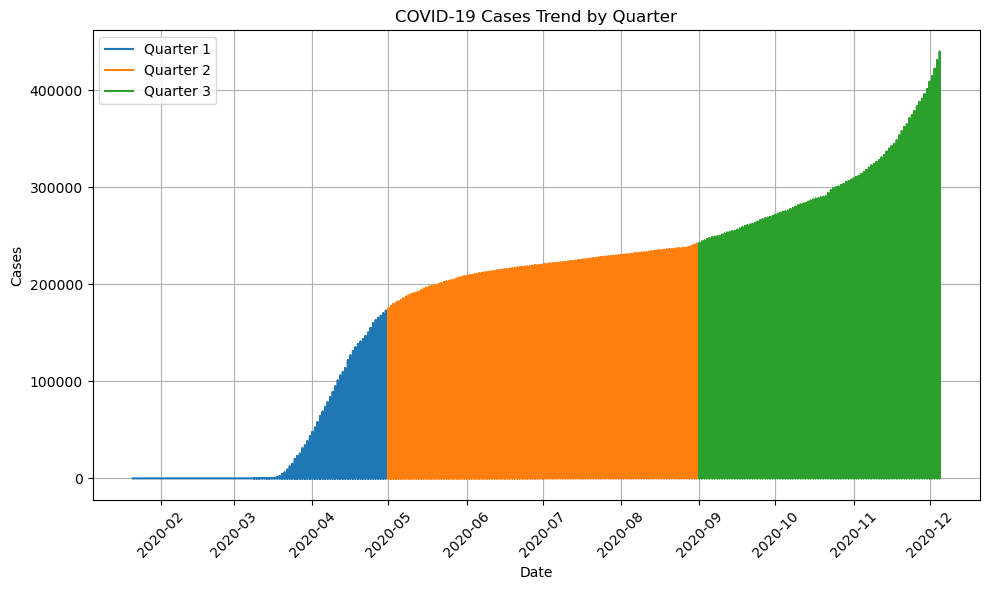

In [30]:
# Create a new column to group by: 1 for months 1-4, 2 for months 5-8, 3 for months 9-12
df['quarter'] = (df['date'].dt.month - 1) // 4
# Group by the new ‘quarter’ column
grouped = df.groupby('quarter')
# Create a line plot to show the trend of COVID-19 cases over time for each quarter
plt.figure(figsize=(10, 6))
for i, group in enumerate(grouped):
    quarter_number, quarter_data = group
    plt.plot(quarter_data['date'], quarter_data['cases'], label=f'Quarter {quarter_number + 1}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Trend by Quarter')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Quarter 1 marked the onset of the outbreak, resulting in a relatively low case count around 17500 (Seventeen Thousand Five Hundred). Throughout Quarter 2, there was a gradual but consistent rise in cases. However, Quarter 3 witnessed a sharp and rapid surge in the number of cases around 400000(Four hundred thousand)

My Quarter

In [13]:
#load in csv
file_path = 'C:/Users/gkaur/OneDrive/Desktop/BOOTCAMP/PROJECT_1/COVID-19_Project-1/Resources/us_counties_covid19_daily.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Changing datatype of 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the first four months
df_first_4_months = df[(df['date'].dt.month >= 1) & (df['date'].dt.month <= 4)]

# Print the filtered DataFrame
print(df_first_4_months)

             date      county       state     fips  cases  deaths
0      2020-01-21   Snohomish  Washington  53061.0      1     0.0
1      2020-01-22   Snohomish  Washington  53061.0      1     0.0
2      2020-01-23   Snohomish  Washington  53061.0      1     0.0
3      2020-01-24        Cook    Illinois  17031.0      1     0.0
4      2020-01-24   Snohomish  Washington  53061.0      1     0.0
...           ...         ...         ...      ...    ...     ...
103865 2020-04-30    Sublette     Wyoming  56035.0      3     0.0
103866 2020-04-30  Sweetwater     Wyoming  56037.0     18     0.0
103867 2020-04-30       Teton     Wyoming  56039.0     96     1.0
103868 2020-04-30       Uinta     Wyoming  56041.0      8     0.0
103869 2020-04-30    Washakie     Wyoming  56043.0      7     0.0

[103870 rows x 6 columns]


COVID CASES QUARTER 1

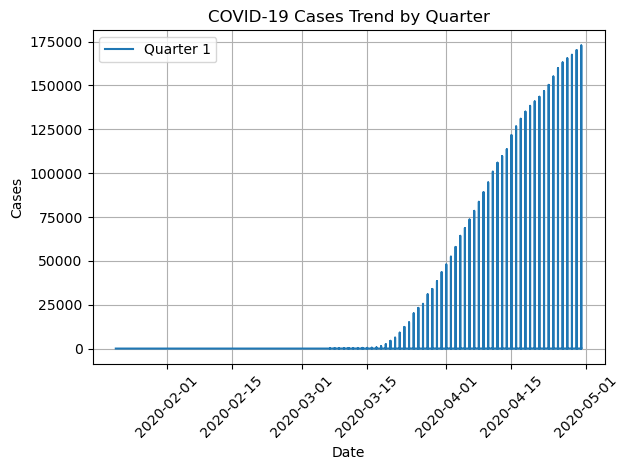

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [14]:
#graph showing quater 1
plt.plot(df_first_4_months['date'], df_first_4_months['cases'], label=f'Quarter 1')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Trend by Quarter')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_first_4_months.head()

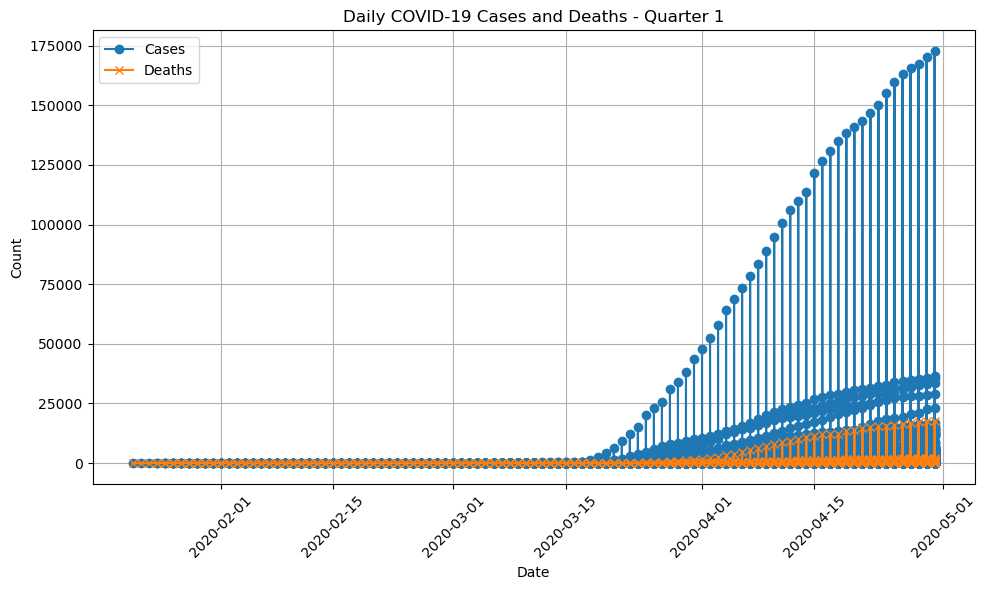

In [15]:
#Graph showing cases and death side by side.
# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
df['quarter'] = (df['date'].dt.month - 1) // 4
# Choose the desired quarter (1, 2 or 3)
selected_quarter = 0
quarter_selected = selected_quarter  + 1
# Filter data for the selected quarter
quarter_data = df[df['quarter'] == selected_quarter]
# Create a line plot to show both daily COVID-19 cases and daily deaths for the selected quarter
plt.figure(figsize=(10, 6))
plt.plot(quarter_data['date'], quarter_data['cases'], label='Cases', marker='o')
plt.plot(quarter_data['date'], quarter_data['deaths'], label='Deaths', marker='x')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'Daily COVID-19 Cases and Deaths - Quarter {quarter_selected}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

MEAN CASES OF THE FIRST 4 MONTHS


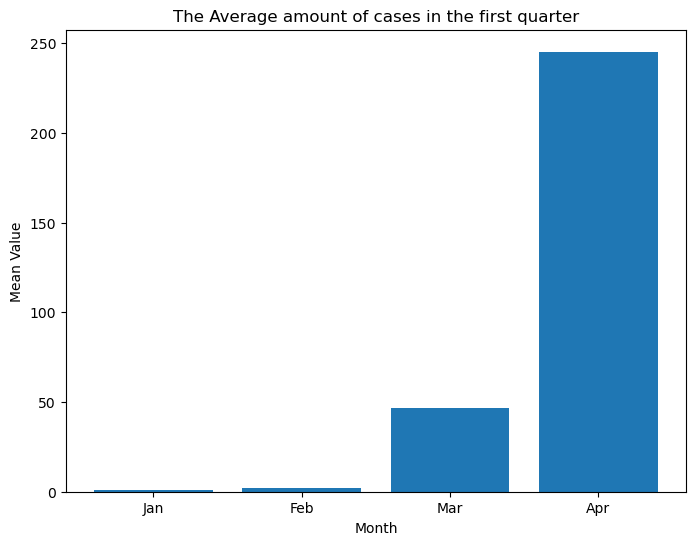

date
1      1.051282
2      2.050139
3     46.654161
4    245.176997
Name: cases, dtype: float64

In [16]:
# Calculate the mean for each month and put it in a graph
monthly_mean_cases = df_first_4_months.groupby(df_first_4_months['date'].dt.month)['cases'].mean()

# Plotting
plt.figure(figsize=(8, 6))  # Adjust the size as needed
plt.bar(monthly_mean_cases.index, monthly_mean_cases.values)
plt.xlabel('Month')
plt.ylabel('Mean Value')
plt.title('The Average amount of cases in the first quarter')
plt.xticks(range(1, 5), ['Jan', 'Feb', 'Mar', 'Apr'])
plt.show()
monthly_mean_cases.head()

In the months of January and February, the reported number of cases remained relatively low, suggesting a limited spread of the virus. However, as we transitioned into March, a noticeable upward trend emerged, indicating a potential escalation in the spread of the virus within the community. This trend reached its highest level in April, with a significant surge in cases, totaling 245.

MEAN DEATH OF THE FIRST 4 MONTHS


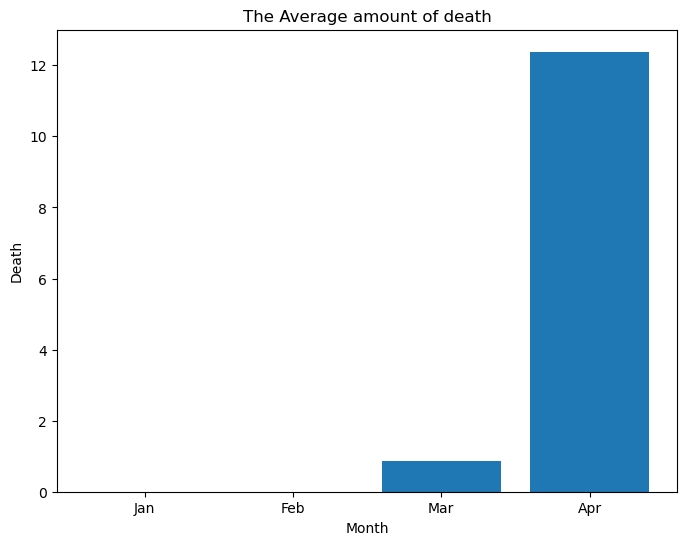

date
1     0.000000
2     0.002786
3     0.863172
4    12.382698
Name: deaths, dtype: float64

In [17]:
# Calculate the mean for each month
monthly_mean = df_first_4_months.groupby(df_first_4_months['date'].dt.month)['deaths'].mean()
# Show the data in a bar graph
plt.figure(figsize=(8, 6))  # Adjust the size as needed
plt.bar(monthly_mean.index, monthly_mean.values)
plt.xlabel('Month')
plt.ylabel('Death')
plt.title('The Average amount of death')
plt.xticks(range(1, 5), ['Jan', 'Feb', 'Mar', 'Apr'])
plt.show()
monthly_mean.head()


The graph highlights a key trend: no deaths occurred in January and February, aligning with low case numbers. However, as cases climbed in March and April, fatalities emerged. April saw 12 deaths, emphasizing the link between rising cases and increased mortality.

TOP 10 states

<Figure size 2000x600 with 0 Axes>

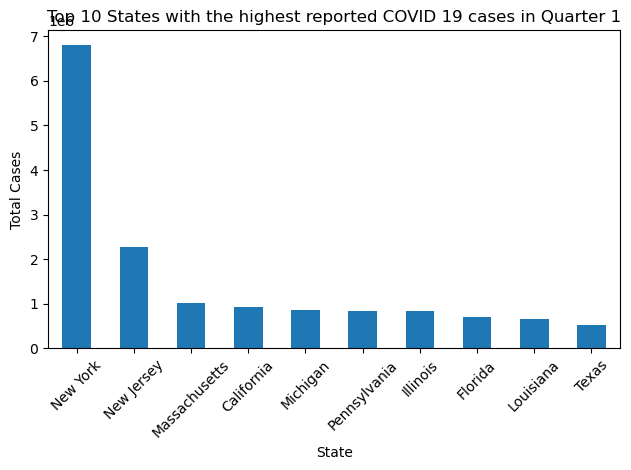

,cases
state,
New York,6793954
New Jersey,2279169
Massachusetts,1012146
California,921290
Michigan,857518
Pennsylvania,846556
Illinois,835573
Florida,706755
Louisiana,654552


In [18]:
#The Top 10 States with the highst covid 19 cases
# Group by state and sum the cases
grouped_by_state = my_data.groupby('state')[['cases']].sum()
# Sort states by total cases in descending order
top_states = grouped_by_state.sort_values(by='cases', ascending=False).head(10)
# Create a bar chart for top 10 states
plt.figure(figsize=(20, 6))
top_states.plot(kind='bar', legend=None)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States with the highest reported COVID 19 cases in Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_states.head(10)

New York reported an strangely high case count of 6,793,952(six million seven hundred ninety-three thousand nine hundred fifty-two), underscoring the widespread impact of the virus in the state. In contrast, Texas registered a comparatively lower count of 515,063(five hundred fifteen thousand sixty-three) cases.

<Figure size 1000x600 with 0 Axes>

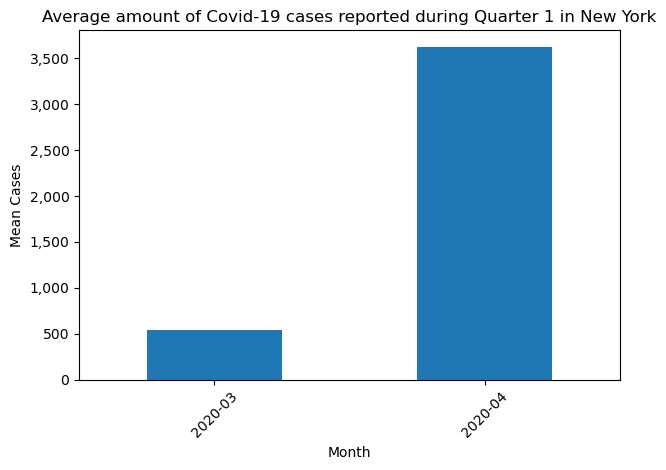

,cases
year_month,
2020-03,545
2020-04,3624


In [19]:
# The average amount of cases in NEW YORK (because New York had the highest amount of cases)
# Group by state and sum the cases
grouped_by_state = my_data.groupby('state')[['cases']].sum()

# Sort states by total cases in descending order
top_states = grouped_by_state.sort_values(by='cases', ascending=False).head(1)

# Get the name of the top state
top_state_name = top_states.index[0]

# Filter data for the top state
top_state_data = my_data[my_data['state'] == top_state_name].copy() 

# Convert 'date' column to datetime type
top_state_data['date'] = pd.to_datetime(top_state_data['date'])

# Extract year and month from the 'date' column
top_state_data['year_month'] = top_state_data['date'].dt.to_period('M')

# Calculate the mean cases for each month in the top state
mean_cases_by_month = top_state_data.groupby('year_month')[['cases']].mean()

# Format numbers in the dataframe without decimals
top_state_data['cases'] = top_state_data['cases'].astype(int)

# Create a bar chart for the top state's mean cases by month
plt.figure(figsize=(10, 6))
mean_cases_by_month['cases'] = mean_cases_by_month['cases'].astype(int)  # Convert to integers
mean_cases_by_month.plot(kind='bar', legend=None, y='cases')

# Format y-axis labels with commas and no decimal points
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.xlabel('Month')
plt.ylabel('Mean Cases')
plt.title(f'Average amount of Covid-19 cases reported during Quarter 1 in {top_state_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mean_cases_by_month.head()

In March, New York averaged 545 cases, reflecting the early impact of the outbreak. This number surged significantly in April, reaching an average of 3624 cases, illustrating a marked a rise in transmission.

<Figure size 1000x600 with 0 Axes>

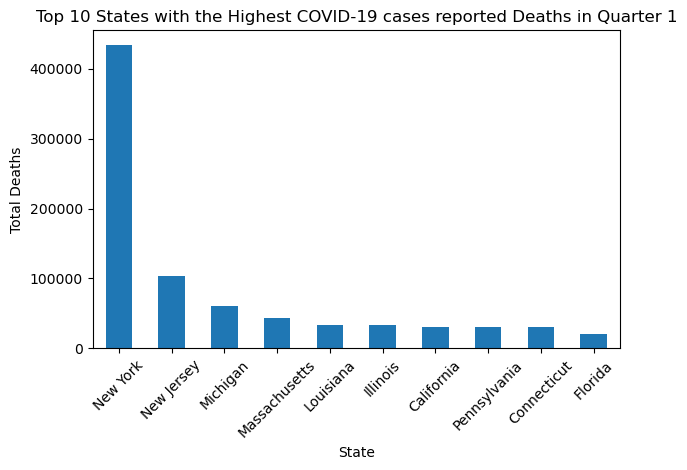

,deaths
state,
New York,433141
New Jersey,103873
Michigan,60486
Massachusetts,43292
Louisiana,34009
Illinois,33092
California,31289
Pennsylvania,30863
Connecticut,30035


In [20]:
# The Top 10 States with the Highest COVID-19 Deaths
# Group by state and sum the deaths
grouped_by_state = my_data.groupby('state')[['deaths']].sum()

# Sort states by total deaths in descending order
top_states_death = grouped_by_state.sort_values(by='deaths', ascending=False).head(10)

# Format numbers in the dataframe without decimals
top_states_death['deaths'] = top_states_death['deaths'].astype(int)

# Create a bar chart for top 10 states
plt.figure(figsize=(10, 6))
top_states_death.plot(kind='bar', legend=None)
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.title('Top 10 States with the Highest COVID-19 cases reported Deaths in Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_states_death.head(10)


New York leads the top 10 states with the highest death count at 433,141(four hundred thirty-three thousand one hundred forty-one), showcasing the severity of the outbreak. In contrast, Florida reports the lowest death count within this group, totaling 19,984(nineteen thousand nine hundred eighty-four).

<Figure size 1000x600 with 0 Axes>

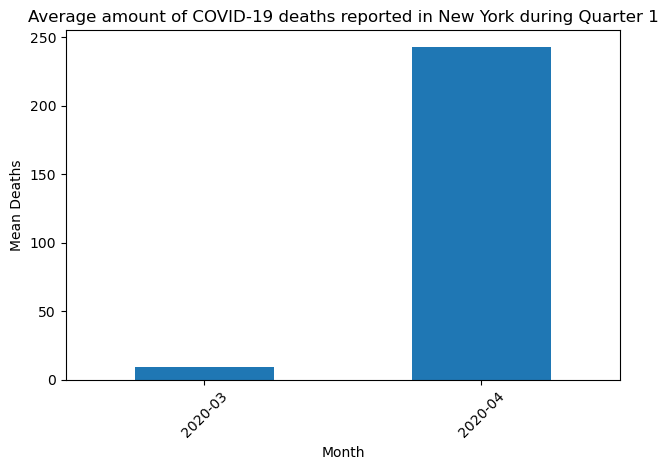

,deaths
year_month,
2020-03,9
2020-04,243


In [21]:
# The average amount of deaths in NEW YORK (because New York had the highest amount of cases)
# Group by state and sum the deaths
grouped_by_state = my_data.groupby('state')[['deaths']].sum()

# Sort states by total deaths in descending order
top_states = grouped_by_state.sort_values(by='deaths', ascending=False).head()

# Get the name of the top state
top_state_name = top_states.index[0]

# Filter data for the top state
top_state_data = my_data[my_data['state'] == top_state_name].copy() 

# Convert 'date' column to datetime type
top_state_data['date'] = pd.to_datetime(top_state_data['date'])

# Extract year and month from the 'date' column
top_state_data['year_month'] = top_state_data['date'].dt.to_period('M')

# Calculate the mean deaths for each month in the top state
mean_death_by_month = top_state_data.groupby('year_month')[['deaths']].mean()

# Format 'deaths' values in the dataframe without decimals
mean_death_by_month['deaths'] = mean_death_by_month['deaths'].astype(int)

# Create a bar chart for the top state's mean deaths by month
plt.figure(figsize=(10, 6))
mean_death_by_month.plot(kind='bar', legend=None)
plt.xlabel('Month')
plt.ylabel('Mean Deaths') 
plt.title(f'Average amount of COVID-19 deaths reported in {top_state_name} during Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mean_death_by_month.head()


In New York, the average number of deaths in March was 9, reflecting a relatively moderate impact. However, the situation saw a dramatic escalation in April, with the average death toll surging to 243.

<Figure size 1500x1200 with 0 Axes>

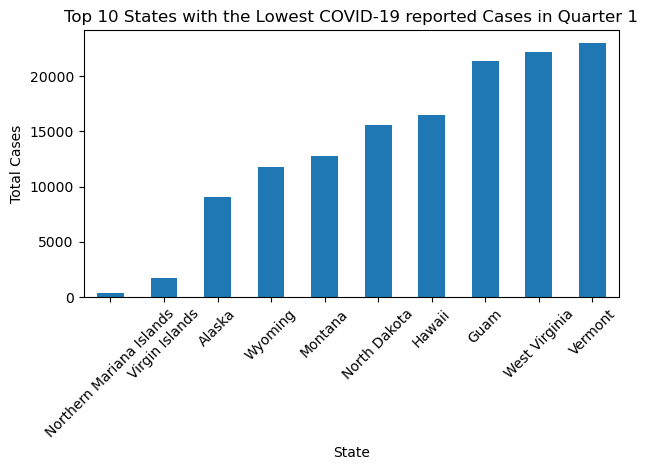

,cases
state,
Northern Mariana Islands,363
Virgin Islands,1760
Alaska,9082
Wyoming,11763
Montana,12738


In [22]:
# The Least 10 States in the US with COVID-19
grouped_by_state = my_data.groupby('state')[['cases']].sum()

# Sort states by total cases in ascending order to get the least cases
least_states = grouped_by_state.sort_values(by='cases', ascending=True).head(10)

# Create a bar chart for least 10 states
plt.figure(figsize=(15, 12))
least_states.plot(kind='bar', legend=None)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States with the Lowest COVID-19 reported Cases in Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
least_states.head()

<Figure size 1000x600 with 0 Axes>

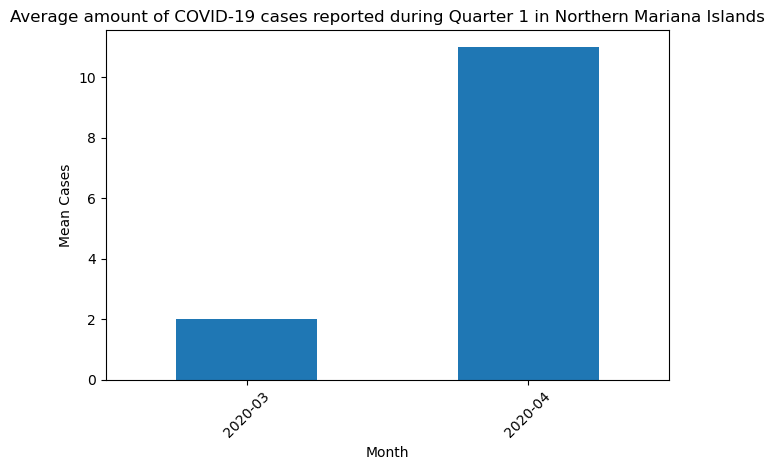

,cases
year_month,
2020-03,2
2020-04,11


In [23]:
# The average amount of cases reported in Nothern Mariana island (because Nothern Mariana island had the highest amount of cases)
# Group by state and sum the cases
grouped_by_state = my_data.groupby('state')[['cases']].sum()

# Sort states by total cases in ascending order
lowest_states = grouped_by_state.sort_values(by='cases', ascending=True).head(1)

# Get the name of the top state
lowest_state_name = lowest_states.index[0]

# Filter data for the top state
lowest_state_data = my_data[my_data['state'] == lowest_state_name].copy() 

# Convert 'date' column to datetime type
lowest_state_data['date'] = pd.to_datetime(lowest_state_data['date'])

# Extract year and month from the 'date' column
lowest_state_data['year_month'] = lowest_state_data['date'].dt.to_period('M')

# Calculate the mean cases for each month in the lowest state
mean_cases_by_month_lowest = lowest_state_data.groupby('year_month')[['cases']].mean()

# Convert 'cases' column to integers
mean_cases_by_month_lowest['cases'] = mean_cases_by_month_lowest['cases'].astype(int)

# Create a bar chart for the lowest state's mean cases by month
plt.figure(figsize=(10, 6))
ax = mean_cases_by_month_lowest.plot(kind='bar', legend=None)

plt.xlabel('Month')
plt.ylabel('Mean Cases')
plt.title(f'Average amount of COVID-19 cases reported during Quarter 1 in {lowest_state_name}')
plt.xticks(rotation=45)
plt.tight_layout()

# Format y-axis labels with commas and no decimal points using plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

mean_cases_by_month_lowest.head()

<Figure size 1000x600 with 0 Axes>

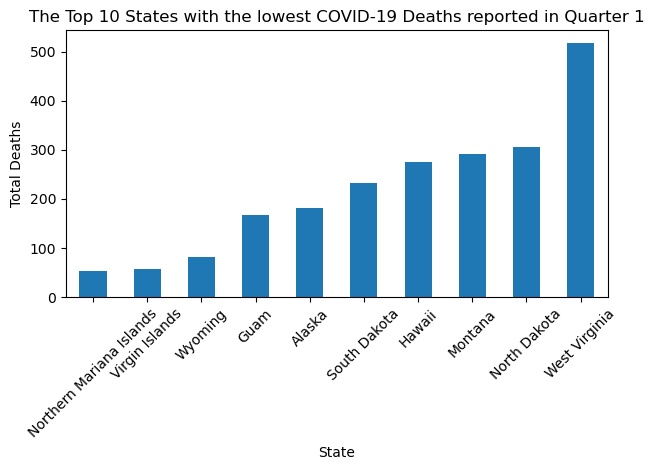

,deaths
state,
Northern Mariana Islands,54
Virgin Islands,57
Wyoming,82
Guam,167
Alaska,181
South Dakota,233
Hawaii,275
Montana,292
North Dakota,305


In [24]:
# The Top 10 States with the lowest COVID-19 Deaths
# Group by state and sum the deaths
grouped_by_state = my_data.groupby('state')[['deaths']].sum()

# Sort states by total deaths in ascending order
lowest_states_death = grouped_by_state.sort_values(by='deaths', ascending=True).head(10)

# Format numbers in the dataframe without decimals
lowest_states_death['deaths'] = lowest_states_death['deaths'].astype(int)

# Create a bar chart for top 10 states
plt.figure(figsize=(10, 6))
lowest_states_death.plot(kind='bar', legend=None)
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.title('The Top 10 States with the lowest COVID-19 Deaths reported in Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

lowest_states_death.head(10)

<Figure size 1000x600 with 0 Axes>

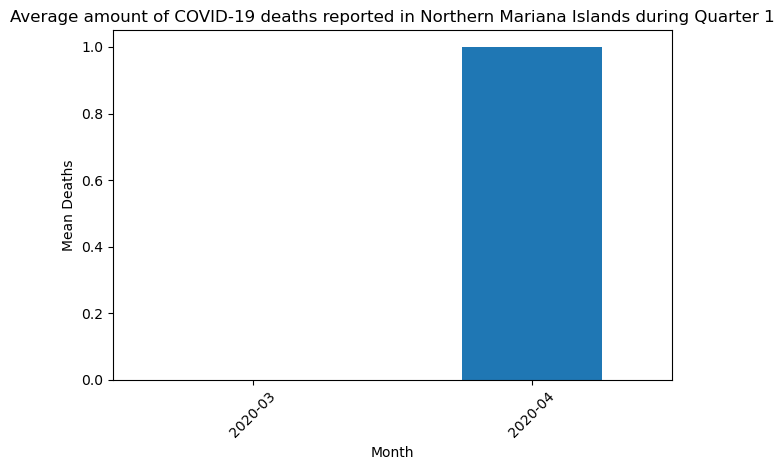

,deaths
year_month,
2020-03,0
2020-04,1


In [25]:
# The average amount of deaths in Northern Mariana Island (because Northern Mariana Islands had the lowest amount of deaths)
# Group by state and sum the deaths
grouped_by_state = my_data.groupby('state')[['deaths']].sum()

# Sort states by total deaths in descending order
lowest_states = grouped_by_state.sort_values(by='deaths', ascending=True).head()

# Get the name of the top state
lowest_state_name = lowest_states.index[0]

# Filter data for the top state
lowest_state_data = my_data[my_data['state'] == lowest_state_name].copy() 

# Convert 'date' column to datetime type
lowest_state_data['date'] = pd.to_datetime(lowest_state_data['date'])

# Extract year and month from the 'date' column
lowest_state_data['year_month'] = lowest_state_data['date'].dt.to_period('M')

# Calculate the mean deaths for each month in the top state
mean_lowest_death_by_month = lowest_state_data.groupby('year_month')[['deaths']].mean()

# Format 'deaths' values in the dataframe without decimals
mean_lowest_death_by_month['deaths'] = mean_lowest_death_by_month['deaths'].astype(int)

# Create a bar chart for the top state's mean deaths by month
plt.figure(figsize=(10, 6))
mean_lowest_death_by_month.plot(kind='bar', legend=None)
plt.xlabel('Month')
plt.ylabel('Mean Deaths') 
plt.title(f'Average amount of COVID-19 deaths reported in {lowest_state_name} during Quarter 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

mean_lowest_death_by_month.head()